In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error

In [ ]:
df= pd.read_csv("house_price_bd.csv")
df

,Title,Bedrooms,Bathrooms,Floor_no,Occupancy_status,Floor_area,City,Price_in_taka,Location
0,We Are Offering You A Very Spacious 1960 Sq Ft...,3.0,4.0,3,vacant,1960.0,dhaka,"৳39,000,000","Gulshan 1, Gulshan"
1,Valuable 1705 Square Feet Apartment Is Ready T...,3.0,3.0,1,vacant,1705.0,dhaka,"৳16,900,000","Lake Circus Road, Kalabagan"
2,1370 square feet apartment is ready to sale in...,3.0,3.0,6,vacant,1370.0,dhaka,"৳12,500,000","Shukrabad, Dhanmondi"
3,2125 Square Feet Apartment For Sale In Bashund...,3.0,3.0,4,vacant,2125.0,dhaka,"৳20,000,000","Block L, Bashundhara R-A"
4,Buy This 2687 Square Feet Flat In The Nice Are...,3.0,3.0,4,vacant,2687.0,dhaka,"৳47,500,000","Road No 25, Banani"
...,...,...,...,...,...,...,...,...,...
3860,"Buy This 1350 Sq Ft Amazing Flat In Gazipur, J...",3.0,3.0,8,vacant,1350.0,gazipur,"৳4,500,000","Joydebpur, Gazipur Sadar Upazila"
3861,Properly Designed This 1000 Square Feet Apartm...,2.0,2.0,7,vacant,1000.0,gazipur,"৳4,300,000","Chandana, Gazipur Sadar Upazila"
3862,1240 Sq Ft Flat For Sale Is Awaiting You In Ga...,3.0,3.0,9,vacant,1240.0,gazipur,"৳4,960,000","Joydebpur, Gazipur Sadar Upazila"
3863,An Apartment Of 1300 Sq Ft Is Up For Sale In J...,3.0,3.0,9,vacant,1300.0,gazipur,"৳5,200,000","Joydebpur, Gazipur Sadar Upazila"


In [ ]:
df.sample(10)

,Title,Bedrooms,Bathrooms,Floor_no,Occupancy_status,Floor_area,City,Price_in_taka,Location
1999,This 129 Sq Ft Shop Is Up For Sale In South Ha...,NaN,NaN,NaN,vacant,129.0,chattogram,"৳3,725,000","39 No. South Halishahar Ward, Halishahar"
2685,Picture Yourself In This Residential Apartment...,3.0,3.0,8,vacant,1835.0,chattogram,"৳13,000,000","New Monsurabad, 10 No. North Kattali Ward"
1711,1290 Sq Ft Ready Commercial Office For Sale In...,NaN,NaN,2,vacant,1290.0,chattogram,"৳11,000,000","Mirzapul Road, Muradpur"
2047,3.5 Katha Plot Is Up For Sale In Kaibalyadham ...,NaN,NaN,NaN,vacant,2520.0,chattogram,"৳14,500,000","Kaibalyadham Housing Society, 9 No. North Paha..."
1427,1657 Square Feet Residential Flat With 3 Bedro...,3.0,3.0,2,vacant,1657.0,dhaka,"৳10,500,000","Sector 18, Uttara"
1790,At Kazirhat 125 Sq Ft Shop Is Ready For Sale,NaN,NaN,NaN,vacant,125.0,chattogram,"৳3,500,000","Mohara, 4 No Chandgaon Ward"
774,We are offering you a very spacious 1090 SQ FT...,3.0,2.0,1,vacant,1090.0,dhaka,"৳5,500,000","West Shewrapara, Mirpur"
3598,Get This Wonderful Plot In Bproperty Village W...,NaN,NaN,NaN,vacant,2160.0,narayanganj-city,"৳4,575,000","Rupganj, Narayanganj"
2883,A Nicely Constructed Apartment Of 2150 Sq Ft I...,3.0,4.0,4,vacant,2150.0,chattogram,"৳13,000,000","Zakir Hossain Road, Khulshi"
1909,An Office Space Of 3638 Sq.Ft Is Vacant For Sa...,NaN,NaN,5,vacant,3638.0,chattogram,"৳65,484,000","Commerce College Road, Double Mooring"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3865 entries, 0 to 3864
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Title             3865 non-null   object 
 1   Bedrooms          2864 non-null   float64
 2   Bathrooms         2864 non-null   float64
 3   Floor_no          3181 non-null   object 
 4   Occupancy_status  3766 non-null   object 
 5   Floor_area        3766 non-null   float64
 6   City              3865 non-null   object 
 7   Price_in_taka     3865 non-null   object 
 8   Location          3859 non-null   object 
dtypes: float64(3), object(6)
memory usage: 271.9+ KB


In [ ]:
df. isnull().sum()

,0
Title,0
Bedrooms,1001
Bathrooms,1001
Floor_no,684
Occupancy_status,99
Floor_area,99
City,0
Price_in_taka,0
Location,6


In [ ]:
df.groupby('Location')['Location'].count()

,Location
Location,
"1 No Railway Gate, Muradpur",5
"1 No. Goli, 29 No. West Madarbari Ward",3
10 No. North Kattali Ward,4
"12 No. Sarai Para Ward, Double Mooring",45
"14 No. Lalkhan Bazaar Ward, Lal Khan Bazaar",14
...,...
"Yakub Nagar Road, 33 No. Firingee Bazaar Ward",10
"Zakir Hosain Road, Mohammadpur",1
"Zakir Hossain By Lane, East Nasirabad",4


In [ ]:
df.groupby('City')['City'].count()

,City
City,
chattogram,1470
cumilla,145
dhaka,1650
gazipur,180
narayanganj-city,420


In [ ]:
df1=df.drop(['Title','Occupancy_status','Location'],axis=1)

In [ ]:
df1

,Bedrooms,Bathrooms,Floor_no,Floor_area,City,Price_in_taka
0,3.0,4.0,3,1960.0,dhaka,"৳39,000,000"
1,3.0,3.0,1,1705.0,dhaka,"৳16,900,000"
2,3.0,3.0,6,1370.0,dhaka,"৳12,500,000"
3,3.0,3.0,4,2125.0,dhaka,"৳20,000,000"
4,3.0,3.0,4,2687.0,dhaka,"৳47,500,000"
...,...,...,...,...,...,...
3860,3.0,3.0,8,1350.0,gazipur,"৳4,500,000"
3861,2.0,2.0,7,1000.0,gazipur,"৳4,300,000"
3862,3.0,3.0,9,1240.0,gazipur,"৳4,960,000"
3863,3.0,3.0,9,1300.0,gazipur,"৳5,200,000"


In [ ]:
df1.isnull().sum()

,0
Bedrooms,1001
Bathrooms,1001
Floor_no,684
Floor_area,99
City,0
Price_in_taka,0


In [ ]:
df1['Bedrooms'].unique()

array([ 3.,  4.,  2., nan, 16.,  8.,  5.,  1.,  6., 18., 46.,  7., 13.,
       33., 50., 23., 21., 22., 20., 27., 15.])

In [ ]:
df1['Bedrooms'].value_counts().sort_index()

,count
Bedrooms,
1.0,3
2.0,406
3.0,2191
4.0,220
5.0,5
6.0,3
7.0,8
8.0,4
13.0,1


In [ ]:
df1[df1['Bedrooms'] == 50.0]

,Bedrooms,Bathrooms,Floor_no,Floor_area,City,Price_in_taka
1717,50.0,10.0,NaN,24500.0,chattogram,"৳70,000,000"
1949,50.0,10.0,NaN,24500.0,chattogram,"৳70,000,000"


In [ ]:
df1[df1['Bedrooms'] == 21.0]

,Bedrooms,Bathrooms,Floor_no,Floor_area,City,Price_in_taka
2100,21.0,10.0,0+7,13300.0,chattogram,"৳105,000,000"
2132,21.0,10.0,1,24000.0,chattogram,"৳60,000,000"
2202,21.0,10.0,1,24000.0,chattogram,"৳60,000,000"


<ipython-input-19-2846096452>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Bedrooms'])


<Axes: xlabel='Bedrooms', ylabel='Density'>

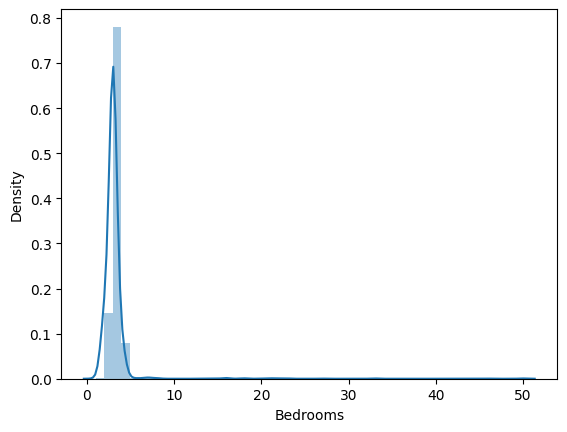

In [ ]:
import seaborn as sns
sns.distplot(df['Bedrooms'])

<ipython-input-20-3286393789>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Bathrooms'])


<Axes: xlabel='Bathrooms', ylabel='Density'>

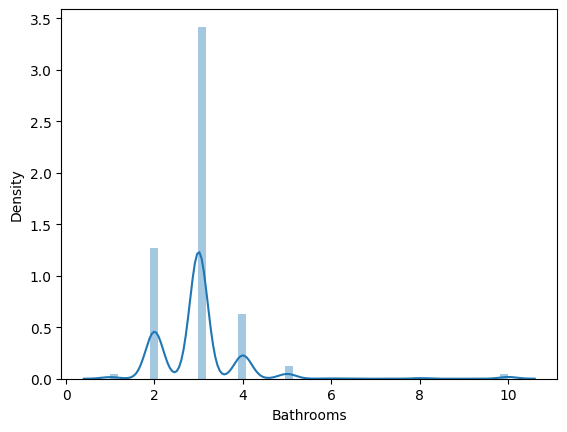

In [ ]:
sns.distplot(df['Bathrooms'])

In [ ]:
df1['Bathrooms'].unique()

array([ 4.,  3.,  2., nan,  5., 10.,  1.,  6.,  8.])

In [ ]:
df1['Bathrooms'].value_counts().sort_index()

,count
Bathrooms,
1.0,22
2.0,653
3.0,1763
4.0,324
5.0,66
6.0,4
8.0,8
10.0,24


In [ ]:
df1['Floor_no'].unique()

array(['3', '1', '6', '4', '8', '2', '5', '7', '9', '8th', nan, '10',
       '14', 'G+7', '13', '12', '1st', '11', 'A1,A2,A3,A4,A5,A6,A7',
       '0+7', '1F', '4th to 8th Backside', '18', '5th', '17',
       'Merin City - Purbach'], dtype=object)

# File Handling

**Convert Floor_no to a clean numeric column so it can be used in regression models.**

In [ ]:
def convert_floor(floor):
    floor= str(floor).lower().strip()

     #Handale simple number like "14" , "13"
    if floor.isdigit():
        return int(floor)

    #Handle ordinal number like '1st' , '5th'
    if 'st' in floor or 'nd' in floor or 'rd' in floor or 'th' in  floor:
        try:
            return int(''.join(filter(str.isdigit,floor)))
        except:
            return np.nan

    ## Handle 'G+7', '0+7', etc.
    if '+' in floor:
        parts= floor.split('+')
        try:
            nums= [int(''.join(filter(str.isdigit, f))) for f in floor.split('to')]
            return sum(nums) // len(nums) #Take average floor
        except:
            return np.nan
     # If it contains comma-separated codes like 'A1,A2,A3'
    if ',' in floor:
        return np.nan #invalid format

    return np.nan #for all other unknown formats

# Apply conversion
df1['Floor_no'] = df1['Floor_no'].apply(convert_floor)

In [ ]:
df1.head()

,Bedrooms,Bathrooms,Floor_no,Floor_area,City,Price_in_taka
0,3.0,4.0,3.0,1960.0,dhaka,"৳39,000,000"
1,3.0,3.0,1.0,1705.0,dhaka,"৳16,900,000"
2,3.0,3.0,6.0,1370.0,dhaka,"৳12,500,000"
3,3.0,3.0,4.0,2125.0,dhaka,"৳20,000,000"
4,3.0,3.0,4.0,2687.0,dhaka,"৳47,500,000"


In [ ]:
df1['Price_in_taka'].sample(10)

,Price_in_taka
197,"৳22,000,000"
1752,"৳7,260,000"
1505,"৳3,500,000"
1,"৳16,900,000"
96,"৳23,000,000"
2881,"৳9,200,000"
3655,"৳3,750,000"
842,"৳9,000,000"
2133,"৳16,000,000"
2684,"৳7,115,000"


**To convert the Price_in_taka column into a numeric format (integer or float)**

In [ ]:
df1['Price_in_taka'] = df1['Price_in_taka'].replace({'৳': '', ',': ''}, regex= True) .astype(int)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3865 entries, 0 to 3864
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Bedrooms       2864 non-null   float64
 1   Bathrooms      2864 non-null   float64
 2   Floor_no       3173 non-null   float64
 3   Floor_area     3766 non-null   float64
 4   City           3865 non-null   object 
 5   Price_in_taka  3865 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 181.3+ KB


In [ ]:
df1.head()

,Bedrooms,Bathrooms,Floor_no,Floor_area,City,Price_in_taka
0,3.0,4.0,3.0,1960.0,dhaka,39000000
1,3.0,3.0,1.0,1705.0,dhaka,16900000
2,3.0,3.0,6.0,1370.0,dhaka,12500000
3,3.0,3.0,4.0,2125.0,dhaka,20000000
4,3.0,3.0,4.0,2687.0,dhaka,47500000


# Outliears

**Filtering out flats that have very small bedrooms — possibly overcrowded or poorly designed**

In [ ]:
df1[df1.Floor_area/df1.Bedrooms < 300]

,Bedrooms,Bathrooms,Floor_no,Floor_area,City,Price_in_taka
139,8.0,4.0,NaN,2146.0,dhaka,10500000
319,8.0,4.0,NaN,2146.0,dhaka,10500000
473,3.0,2.0,5.0,875.0,dhaka,5700000
492,3.0,2.0,6.0,750.0,dhaka,5200000
524,3.0,2.0,4.0,820.0,dhaka,6000000
542,3.0,3.0,1.0,850.0,dhaka,7000000
551,3.0,2.0,4.0,879.0,dhaka,5274000
772,3.0,2.0,1.0,820.0,dhaka,3700000
803,1.0,1.0,3.0,250.0,dhaka,3400000
828,4.0,3.0,7.0,1160.0,dhaka,4408000


In [ ]:
df1.shape

(3865, 6)

In [ ]:
df2=df1[~(df1.Floor_area/df1.Bedrooms < 300)]
df2.shape

(3843, 6)

In [ ]:
df2.Price_in_taka.describe()

,Price_in_taka
count,3.843000e+03
mean,1.260506e+07
std,2.918947e+07
min,6.600000e+01
25%,4.945000e+06
50%,7.000000e+06
75%,1.100000e+07
max,5.320000e+08


<ipython-input-34-2319876372>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2.Price_in_taka, bins=100)


<Axes: xlabel='Price_in_taka', ylabel='Density'>

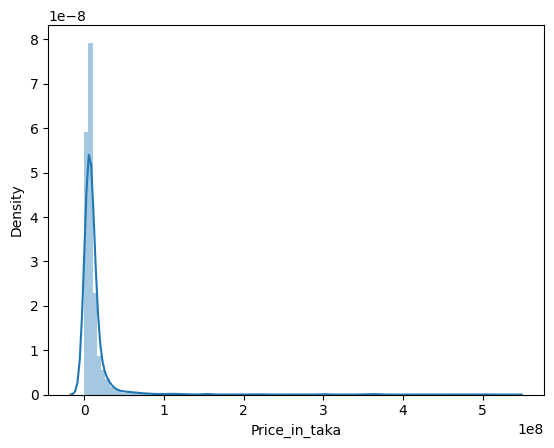

In [ ]:
sns.distplot(df2.Price_in_taka, bins=100)

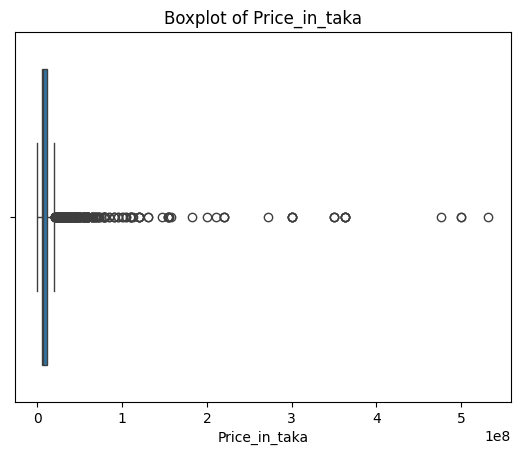

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df2['Price_in_taka'])
plt.title('Boxplot of Price_in_taka')
plt.show()


In [ ]:
Q1 = df2['Price_in_taka'].quantile(0.25)
Q3 = df2['Price_in_taka'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the dataframe
df3 = df2[(df2['Price_in_taka'] >= lower_bound) & (df2['Price_in_taka'] <= upper_bound)]


In [ ]:
df3.shape

(3458, 6)

In [ ]:
df3[df3.Price_in_taka<1500000]

,Bedrooms,Bathrooms,Floor_no,Floor_area,City,Price_in_taka
1727,NaN,NaN,1.0,86.0,chattogram,1050000
1891,NaN,NaN,2.0,200.0,chattogram,1300000
1892,NaN,NaN,2.0,200.0,chattogram,1300000
1959,NaN,NaN,1.0,86.0,chattogram,1050000
2009,NaN,NaN,NaN,NaN,chattogram,54235
2010,NaN,NaN,NaN,NaN,chattogram,6669
2048,NaN,NaN,NaN,NaN,chattogram,66
2178,NaN,NaN,1.0,84.0,chattogram,1250000
2599,NaN,NaN,1.0,95.0,chattogram,1240000
2600,NaN,NaN,1.0,90.0,chattogram,1260000


In [ ]:
df3 = df3[df3['Price_in_taka'] >= 1500000]


In [ ]:
df3.shape

(3442, 6)

In [ ]:
df3.Price_in_taka.describe()

,Price_in_taka
count,3.442000e+03
mean,7.475247e+06
std,3.742465e+06
min,1.500000e+06
25%,4.672500e+06
50%,6.500000e+06
75%,9.000000e+06
max,2.000000e+07


<ipython-input-42-1446721712>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3.Price_in_taka)


<Axes: xlabel='Price_in_taka', ylabel='Density'>

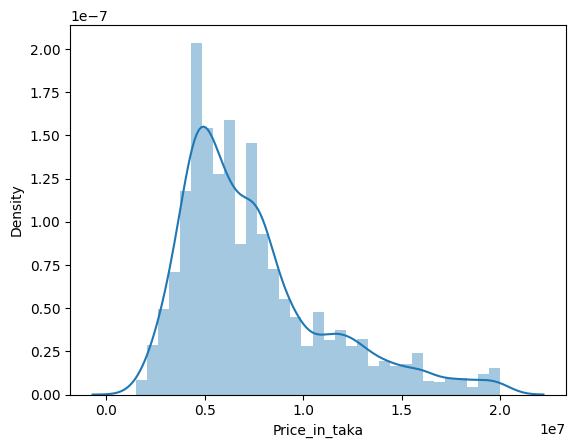

In [ ]:
sns.distplot(df3.Price_in_taka)

In [ ]:
df1.head()

,Bedrooms,Bathrooms,Floor_no,Floor_area,City,Price_in_taka
0,3.0,4.0,3.0,1960.0,dhaka,39000000
1,3.0,3.0,1.0,1705.0,dhaka,16900000
2,3.0,3.0,6.0,1370.0,dhaka,12500000
3,3.0,3.0,4.0,2125.0,dhaka,20000000
4,3.0,3.0,4.0,2687.0,dhaka,47500000


In [ ]:
df3.Floor_area.describe()

,Floor_area
count,3373.000000
mean,1469.730803
std,1127.426282
min,89.000000
25%,1080.000000
50%,1337.000000
75%,1646.000000
max,43200.000000


<ipython-input-45-3457127852>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Floor_area)


<Axes: xlabel='Floor_area', ylabel='Density'>

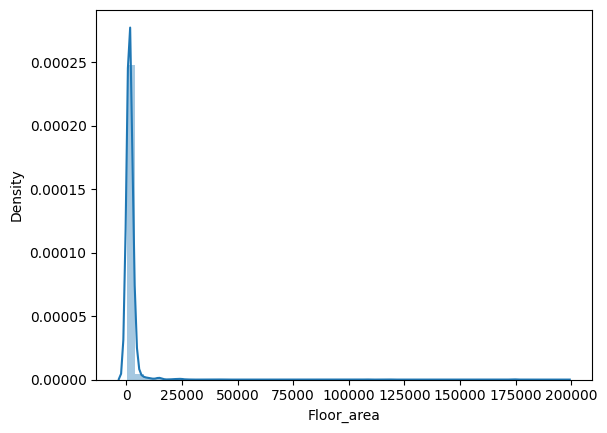

In [ ]:
sns.distplot(df.Floor_area)

**Remove Floor Area Outliers Using IQR**

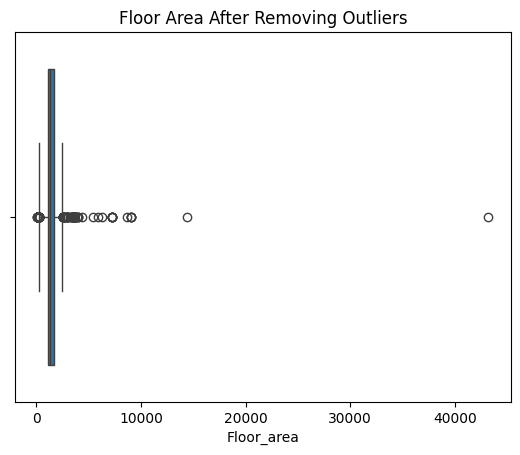

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df3['Floor_area'])
plt.title("Floor Area After Removing Outliers")
plt.show()


In [ ]:
Q1 = df3['Floor_area'].quantile(0.25)
Q3 = df3['Floor_area'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df3 = df3[(df3['Floor_area'] >= lower_bound) & (df3['Floor_area'] <= upper_bound)]


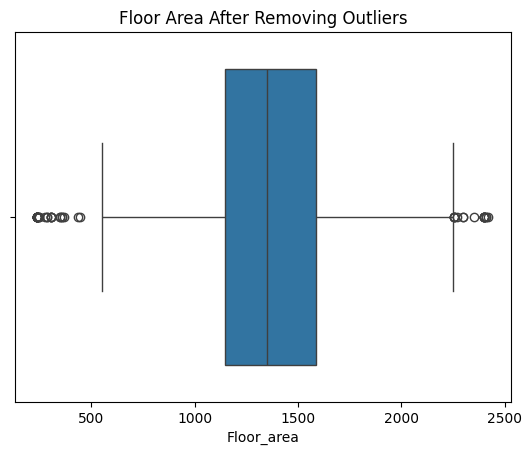

In [ ]:
sns.boxplot(x=df3['Floor_area'])
plt.title("Floor Area After Removing Outliers")
plt.show()


<ipython-input-49-147147731>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3.Floor_area)


<Axes: xlabel='Floor_area', ylabel='Density'>

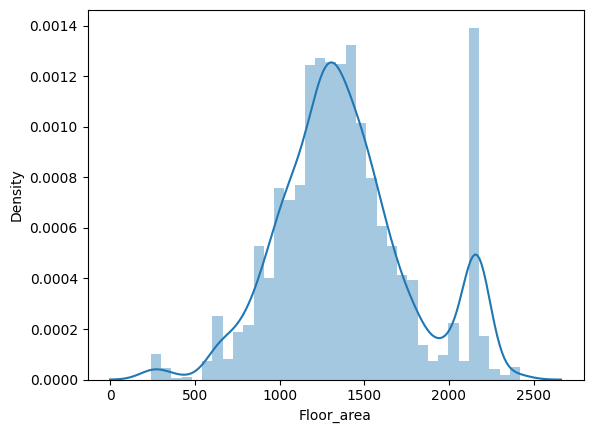

In [ ]:
sns.distplot(df3.Floor_area)

In [ ]:
df3.Floor_area.value_counts()

,count
Floor_area,
2160.0,226
1300.0,99
1500.0,91
1200.0,76
1250.0,76
...,...
1035.0,1
1032.0,1
773.0,1


In [ ]:
df3.Floor_area.describe()

,Floor_area
count,2883.000000
mean,1386.994797
std,396.119520
min,240.000000
25%,1145.000000
50%,1350.000000
75%,1587.000000
max,2420.000000


In [ ]:
df3.isnull().sum()

,0
Bedrooms,287
Bathrooms,287
Floor_no,253
Floor_area,0
City,0
Price_in_taka,0


# Encoding Technique

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [ ]:
numerical_cols = ['Bedrooms', 'Bathrooms', 'Floor_no', 'Floor_area']
categorical_cols = ['City']

# Numerical transformer pipeline
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Categorical transformer pipeline
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(categories=[[
        'cumilla',
        'gazipur',
        'narayanganj-city',
        'chattogram',
        'dhaka'
    ]]))
])

# Preprocessor for both numerical and categorical features
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_cols),
    ('cat', categorical_transformer, categorical_cols)
])


In [ ]:
X = df3.drop('Price_in_taka', axis=1)
y = df3['Price_in_taka']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(2306, 5)

# Model Implement

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Support Vector Regressor': SVR(),
    'XGBoost' : XGBRegressor()
}


results = {}
for model_name, model in models.items():

    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    pipeline.fit(X_train, y_train)

    preds = pipeline.predict(X_test)

    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)

    results[model_name] = {'MAE': mae, 'R2 Score': r2}

for model_name, metrics in results.items():
    print(f"{model_name}:")
    print(f"   Mean Absolute Error: {metrics['MAE']}")
    print(f"   R2 Score: {metrics['R2 Score']}")

    print('--------------------------------------')

Linear Regression:
   Mean Absolute Error: 2123428.941674695
   R2 Score: 0.41285917317215004
--------------------------------------
Ridge Regression:
   Mean Absolute Error: 2123351.156838618
   R2 Score: 0.4128588257999609
--------------------------------------
Lasso Regression:
   Mean Absolute Error: 2123428.698780885
   R2 Score: 0.41285923298476346
--------------------------------------
Random Forest:
   Mean Absolute Error: 1130687.9991331147
   R2 Score: 0.7340446257117595
--------------------------------------
Gradient Boosting:
   Mean Absolute Error: 1352371.833431368
   R2 Score: 0.7066411432872136
--------------------------------------
Support Vector Regressor:
   Mean Absolute Error: 2703065.962311409
   R2 Score: -0.04964357252297247
--------------------------------------
XGBoost:
   Mean Absolute Error: 1214492.875
   R2 Score: 0.7056894302368164
--------------------------------------


In [ ]:
from sklearn.model_selection import GridSearchCV

# Example for Ridge
param_grid = {
    'model__alpha': [0.1, 1.0, 10.0]
}

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', Ridge())])

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

print("Best MAE:", -grid_search.best_score_)
print("Best params:", grid_search.best_params_)


Best MAE: 2043289.8259406039
Best params: {'model__alpha': 10.0}
